Importing the required modules

In [1]:
%matplotlib inline

import numpy
import pandas as pd
import matplotlib as matplot 
import seaborn

Read the datast using Pandas

In [2]:
data = pd.read_csv('/home/surajr/Downloads/Crimes_2012-2015.csv',parse_dates={"ArrestDateTime":["DATE.OCC","TIME.OCC"]})

Explore the data which is read

In [3]:
data.head()

,ArrestDateTime,Date.Rptd,DR.NO,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013 2015,03/20/2013,132007717,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013 445,03/10/2013,130608787,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013 745,12/18/2013,131820260,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013 1730,10/18/2013,131817514,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/25/2013 2000,05/26/2013,130510483,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"


ArrestDateTime is not in proper DateTime format. Let's convert.

In [4]:
def converttodate():
    new=[]
    toconvert = data["ArrestDateTime"]
    for a in toconvert:
        obj = a.split(" ")   
        time = str(obj[1])
        if len(time)==4:
            time = time[:2]+':'+time[2:]         
            new.append(obj[0]+" "+time)
        elif len(time)==3:
            time = '0'+time[:1]+':'+time[1:]         
            new.append(obj[0]+" "+time)
        elif len(time)==2:        
            time = '0'+time[0]+':'+time[0:]
            new.append(obj[0]+" "+time)        
        else:
            time = time+'0:00'
            new.append(obj[0]+" "+time)
        
    return new

Update the column with the converted values.

In [5]:
newArrestDateTime = converttodate()
data = data.drop("ArrestDateTime", axis=1)
data["ArrestDateTime"] = newArrestDateTime

In [6]:
data.head()

,Date.Rptd,DR.NO,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,ArrestDateTime
0,03/20/2013,132007717,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)",03/20/2013 20:15
1,03/10/2013,130608787,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)",03/10/2013 04:45
2,12/18/2013,131820260,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)",12/18/2013 07:45
3,10/18/2013,131817514,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)",10/18/2013 17:30
4,05/26/2013,130510483,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)",05/25/2013 20:00


Finding the area in Los Angeles with highest Crime rate.

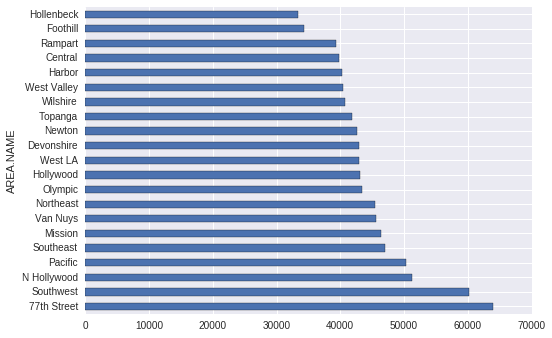

In [7]:
(     data["AREA.NAME"]
     .groupby(data["AREA.NAME"])
     .count()
     .sort_values(ascending=False)
     .plot(kind="barh")
)

Highest Crime rate in Los Angeles area from 2012 - 2015: 77th Street 

#### Status of crimes reported

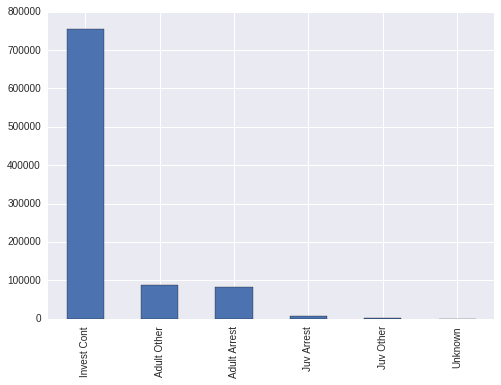

In [8]:
(
    data["Status.Desc"]
    .value_counts()
    .plot(kind="bar")
)

Southwest, (place where I stay) is ranked as second highest in crime rate. 
This is obvious because Southwest covers Downtown and USC. 

I'm interested in finding interesting patterns for Southwest area. Lts explore more specifically on Southwest area.

In [9]:
Southwest = data.set_index(['AREA.NAME']).loc['Southwest']
Southwest.head(5)

,Date.Rptd,DR.NO,AREA,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,ArrestDateTime
AREA.NAME,,,,,,,,,,,,
Southwest,08/19/2014,140318169,3,319,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,FIGUEROA,12TH,"(34.0419, -118.2669)",08/22/2014 14:30
Southwest,08/06/2014,140317124,3,331,950,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400",IC,Invest Cont,4700 W ADAMS BL,NaN,"(34.0325, -118.3506)",08/06/2014 16:00
Southwest,07/29/2014,140316678,3,356,930,"THREATS, VERBAL/TERRORIST",IC,Invest Cont,1600 W 36TH ST,NaN,"(34.0228, -118.306)",07/30/2014 14:00
Southwest,01/22/2014,140305240,3,392,997,TRAFFIC DR #,IC,Invest Cont,11TH AV,50TH ST,"(33.9964, -118.3294)",01/22/2014 10:20
Southwest,07/16/2014,140315935,3,376,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,3900 HALLDALE AV,NaN,"(34.0155, -118.3023)",07/18/2014 08:00


Total crimes happened between 2012 - 2015 in Southwest of Los Angeles.

In [10]:
Southwest.groupby('AREA').size()

AREA
3    60191
dtype: int64

Count of different types of Crimes in Southwest of Los Angeles between 2012 - 2015

In [11]:
Southwest["Date.Rptd"] = pd.to_datetime(Southwest["Date.Rptd"])

In [12]:
pd.set_option('display.max_rows', 1000)
(    Southwest
     .groupby('CrmCd.Desc')
     .size()
     .head(25)
     .sort_values(ascending=False)
)

CrmCd.Desc
BATTERY - SIMPLE ASSAULT                                    6238
BURGLARY                                                    3392
BURGLARY FROM VEHICLE                                       2887
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              2539
ATTEMPTED ROBBERY                                            369
BURGLARY, ATTEMPTED                                          366
BATTERY WITH SEXUAL CONTACT                                  304
BIKE - STOLEN                                                280
BRANDISH WEAPON                                              190
BATTERY POLICE                                               127
ARSON                                                         84
BURGLARY FROM VEHICLE, ATTEMPTED                              75
BUNCO, GRAND THEFT                                            72
CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT                   50
BUNCO, PETTY THEFT                                            39
ASSAULT WITH D

Out of 60,191 crimes in the last 3 years, Traffic DR# and 'Battery - Simple Assault' are the top most crimes.

#### Bike stolen : 280 
This count is very less because it's very common near school. Maybe they are not reported to LAPD.

### Ploting the graph for top 30 crimes in Southwest of Los Angeles

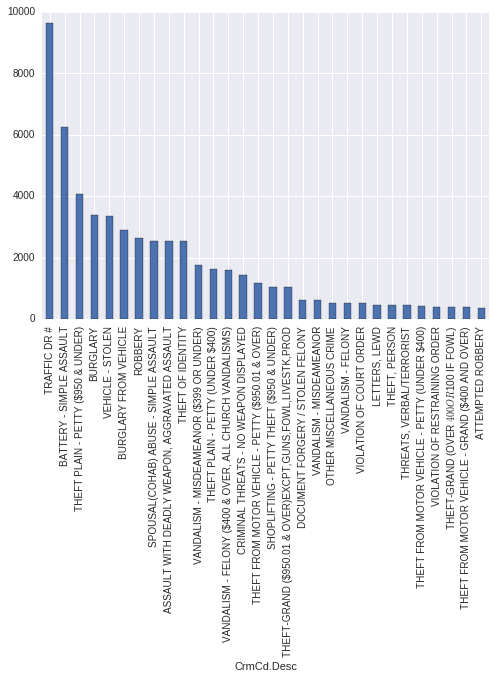

In [13]:
(
    Southwest
    .groupby('CrmCd.Desc')
    .size()
    .sort_values(ascending=False)
    .head(30)
    .plot(kind="bar")
)

### Crimes reported in Southwest area each year

#### Between 2015 - 2016

In [14]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
         .groupby(["CrmCd.Desc"])         
         .agg({'CrmCd.Desc':numpy.size})
         .head(25)
         .sort_values(["CrmCd.Desc"],ascending=False)         
)

,CrmCd.Desc
CrmCd.Desc,
BATTERY - SIMPLE ASSAULT,1239
BURGLARY,724
BURGLARY FROM VEHICLE,641
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",618
BIKE - STOLEN,200
BATTERY WITH SEXUAL CONTACT,98
"BURGLARY, ATTEMPTED",94
ATTEMPTED ROBBERY,87
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,62


Lets visuliaze the data by plotting graphs

###### Number of incidents reported between 2015 to 2016

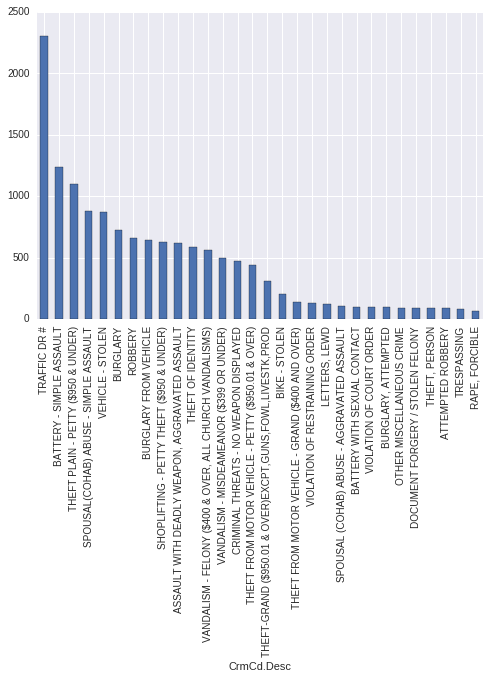

In [15]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
        .groupby('CrmCd.Desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

##### Number of incidents reported between 2014 - 2015

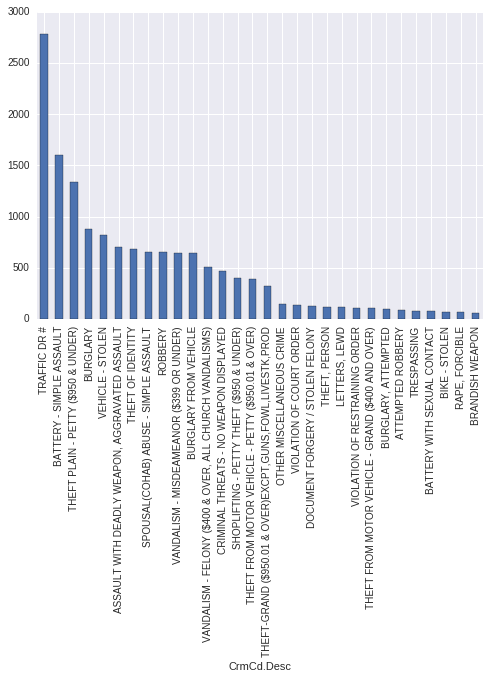

In [16]:
(Southwest[(Southwest['Date.Rptd']>="2014-01-01") & 
          (Southwest['Date.Rptd']<"2015-01-01")] 
        .groupby('CrmCd.Desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

##### Similarly between 2013 - 2014

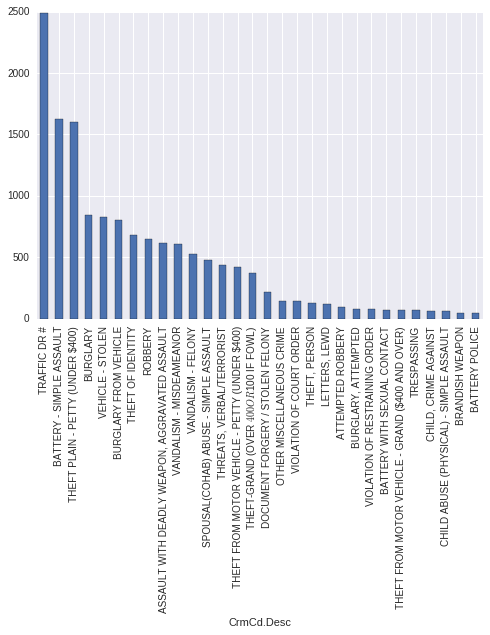

In [17]:
(Southwest[(Southwest['Date.Rptd']>="2013-01-01") & 
          (Southwest['Date.Rptd']<"2014-01-01")] 
        .groupby('CrmCd.Desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

##### Status of crimes reported between 2015 - 2016

In [18]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
         .groupby(["Status.Desc"])         
         .agg({'Status.Desc':numpy.size})
         .sort_values(["Status.Desc"],ascending=False)
         
)

,Status.Desc
Status.Desc,
Invest Cont,12398
Adult Other,1294
Adult Arrest,899
Juv Arrest,134
Juv Other,29


The given data does not provide track a crime from reported to completed status. Hence this data gives a snapshot only during reporting. 

Now let's explore the crimes reported in Streets of Southwest area between 2015 - 2016 
(This is even more interesting)

In [20]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
         .groupby(["LOCATION"])         
         .agg({'LOCATION':numpy.size})         
         .sort_values(["LOCATION"],ascending=False)
         .head(25)
         
)

,LOCATION
LOCATION,
4100 CRENSHAW BL,256
MARTIN LUTHER KING JR BL,203
CRENSHAW BL,187
4000 CRENSHAW BL,170
3500 S LA CIENEGA BL,154
JEFFERSON BL,143
ADAMS BL,134
WESTERN AV,120
VERMONT AV,103


JEFFERSON BL, ADAMS BL, VERMONT AV, FIGUEROA ST, ADAMS, EXPOSITION BL, W ADAMS BL - These are the areas where I stay and my school located. Glad to see the number of crimes.

In [23]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
         .groupby(["LOCATION","CrmCd.Desc"])         
         .agg({'LOCATION':numpy.size})         
         .sort_values(["LOCATION"],ascending=False)
         .head(25)
)

,,LOCATION
LOCATION,CrmCd.Desc,
4100 CRENSHAW BL,SHOPLIFTING - PETTY THEFT ($950 & UNDER),186
4000 CRENSHAW BL,SHOPLIFTING - PETTY THEFT ($950 & UNDER),124
MARTIN LUTHER KING JR BL,TRAFFIC DR #,113
CRENSHAW BL,TRAFFIC DR #,110
3500 S LA CIENEGA BL,SHOPLIFTING - PETTY THEFT ($950 & UNDER),104
JEFFERSON BL,TRAFFIC DR #,104
ADAMS BL,TRAFFIC DR #,99
WESTERN AV,TRAFFIC DR #,85
FIGUEROA ST,TRAFFIC DR #,74


###### Traffic DR#, Robbery, Theft are the top happening crimes around USC/Downtown.

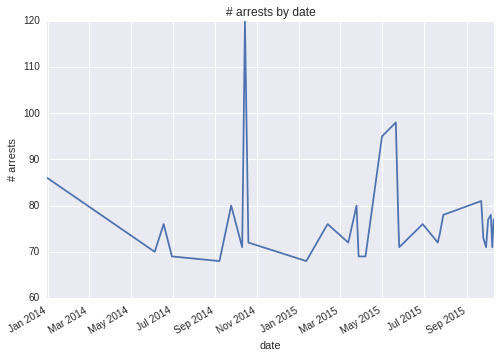

In [24]:
(Southwest
        .groupby('Date.Rptd')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(title="# arrests by date")
        .set(xlabel = "date",ylabel = "# arrests")
)

We can conclude that most number of crimes happening in Southwest of Los Angeles area are Traffic DR#, Battery assualt etc. The crimes are usually high during the late november and early June.

##### Inference:
When the schools are closed then there are high chances of crime in my area.
##### OR
When we observe high crime in Southwest of Los Angeles, then it implies that USC is closed for vacation!